In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps

# 1. Data Exploration and Preprocessing:

In [2]:
data = pd.read_csv("adult_with_headers.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
# Handling missing values
data.dropna(inplace=True)

In [8]:
data.reset_index(drop=True,inplace=True)

In [9]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
str_features = data.select_dtypes(include=['object']).columns.tolist()
str_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [10]:
copy_data = data

In [11]:
scaler_standard = StandardScaler()
standard_scaled = scaler_standard.fit_transform(copy_data[num_features])
standard_scaled = pd.DataFrame(standard_scaled, columns=num_features)
standard_scaled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [12]:
#Min-Max Scaling
scaler = MinMaxScaler()
minmax_scaled = scaler.fit_transform(copy_data[num_features])
minmax_scaled = pd.DataFrame(minmax_scaled, columns=num_features)
minmax_scaled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [13]:
#Standard Scaling: Centers data around a mean of 0 with a standard deviation of 1, useful for algorithms assuming normality or distance-based methods.

In [14]:
#Min-Max Scaling: Scales data to a fixed range, typically 0, 1 preserving the relationships and proportions of features.

# 2. Encoding Techniques:

In [15]:
cat_cols = [col for col in standard_scaled.select_dtypes(include=['object']).columns if standard_scaled[col].nunique() < 4]
# Apply One-Hot Encoding
standard_scaled = pd.get_dummies(standard_scaled, columns=cat_cols, drop_first=True)

# Identify categorical columns with more than 5 categories in the updated DataFrame
cat_cols = [col for col in standard_scaled.select_dtypes(include=['object']).columns if standard_scaled[col].nunique() >= 4]

label_encoders = {}

# Apply Label Encoding to these columns
for col in cat_cols:
    le = LabelEncoder()
    standard_scaled[col] = le.fit_transform(standard_scaled[col])
    label_encoders[col] = le
standard_scaled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [16]:
#One-Hot Encoding
#Pros: No ordinal relationships introduced; robust for algorithms needing numerical inputs.
#Cons: High dimensionality with many categories.

In [17]:
#Label Encoding
#Pros: Simple and memory-efficient.
#Cons: May introduce ordinal bias, which could affect some algorithms.

# 3. Feature Engineering:

In [18]:
copy_data['hours_per_week_income'] = copy_data['hours_per_week'] * (copy_data['income'] == '>50K').astype(int)

In [19]:
copy_data['age_group'] = pd.cut(data['age'], bins=[0, 25, 45, 65, 90], labels=['Youth', 'Adult', 'Senior', 'Elderly'])

In [20]:
copy_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,hours_per_week_income,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,Adult
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,Senior
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,Adult
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,Senior
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Adult


In [21]:
# Identify skewed numerical columns
skewed_cols = copy_data[num_features].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_col = skewed_cols.index[0]

In [22]:
skewed_col

'capital_gain'

In [23]:
# Log transformation
copy_data[skewed_col + '_log'] = np.log1p(copy_data[skewed_col])

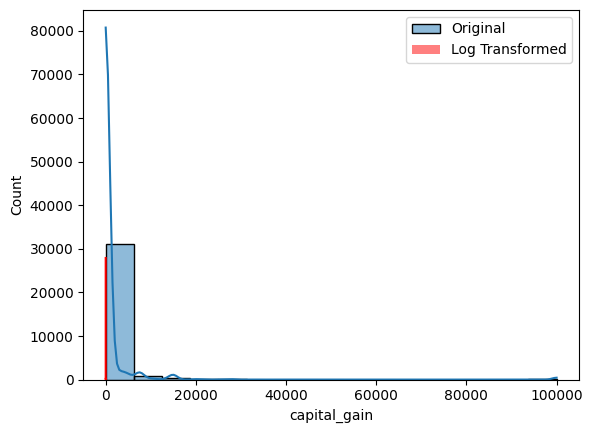

In [24]:
# Visualization
sns.histplot(copy_data[skewed_col], kde=True, label='Original')
sns.histplot(copy_data[skewed_col + '_log'], kde=True, color='red', label='Log Transformed')
plt.legend()
plt.show()

# 4.Feature Selection:

In [25]:
isolation_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = isolation_forest.fit_predict(copy_data[num_features])

In [26]:
# Convert to DataFrame
outliers_df = pd.DataFrame({'Outlier': outliers})
data_with_outliers = pd.concat([copy_data, outliers_df], axis=1)

# Display the data with outliers marked
print(data_with_outliers)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [27]:
data_cleaned = data[outliers == 1]
data_cleaned.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,hours_per_week_income,age_group,capital_gain_log
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,Adult,7.684784
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,Senior,0.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,Adult,0.000000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,Senior,0.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,Adult,0.000000


In [28]:
pps_matrix = pps.matrix(data_cleaned)
print(pps_matrix.head())

C:\Users\sanke\anaconda3\envs\notebook\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\sanke\anaconda3\envs\notebook\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\sanke\anaconda3\envs\notebook\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\sanke\anaconda3\envs\notebook\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\sanke\anaconda3\envs\notebook\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is

     x              y   ppscore            case  is_valid_score  \
0  age            age  1.000000  predict_itself            True   
1  age      workclass  0.015886  classification            True   
2  age         fnlwgt  0.000000      regression            True   
3  age      education  0.062851  classification            True   
4  age  education_num  0.000000      regression            True   

                metric  baseline_score   model_score                     model  
0                 None        0.000000      1.000000                      None  
1          weighted F1        0.580136      0.586806  DecisionTreeClassifier()  
2  mean absolute error    76365.880400  77529.366217   DecisionTreeRegressor()  
3          weighted F1        0.200600      0.250843  DecisionTreeClassifier()  
4  mean absolute error        1.829400      1.870954   DecisionTreeRegressor()  


C:\Users\sanke\AppData\Local\Temp\ipykernel_13216\2755871367.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_cleaned.corr()


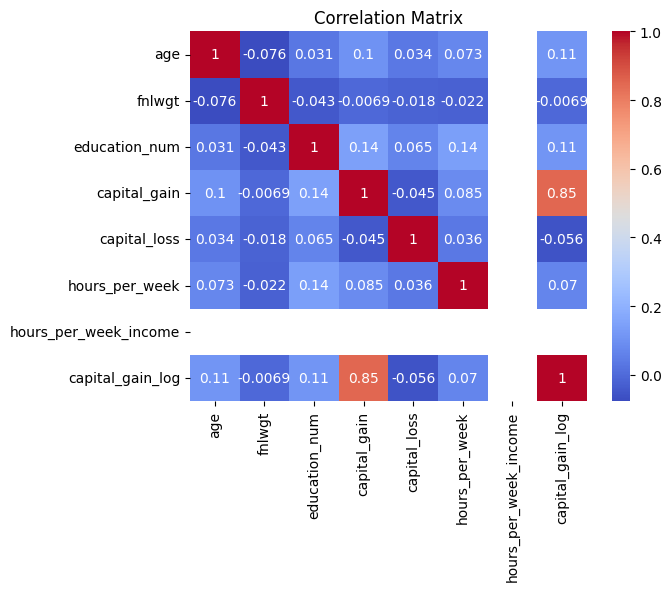

In [29]:
# Compare with Correlation Matrix
corr_matrix = data_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\sanke\AppData\Local\Temp\ipykernel_13216\699757358.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(pps_matrix.pivot('x', 'y', 'ppscore'), annot=True, cmap='coolwarm')


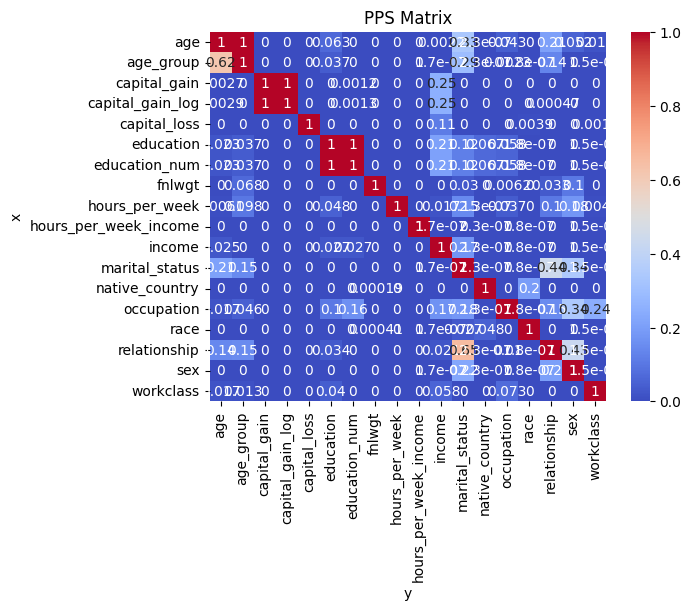

In [30]:
sns.heatmap(pps_matrix.pivot('x', 'y', 'ppscore'), annot=True, cmap='coolwarm')
plt.title('PPS Matrix')
plt.show()